In [12]:
# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

sns.set(style="whitegrid")


In [13]:
import pandas as pd

# Load dataset
url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
df = pd.read_csv(url, sep='\t', header=None, names=['label', 'message'])

print(df.head())


  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [14]:
# Step 4: Describe and summarize the dataset
print("\n📏 Dataset shape:", df.shape)
print("\n🔍 Dataset info:")
print(df.info())

print("\n📊 Class distribution:")
print(df['label'].value_counts())

print("\n📈 Statistical summary:")
print(df.describe())



📏 Dataset shape: (5572, 2)

🔍 Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None

📊 Class distribution:
label
ham     4825
spam     747
Name: count, dtype: int64

📈 Statistical summary:
       label                 message
count   5572                    5572
unique     2                    5169
top      ham  Sorry, I'll call later
freq    4825                      30


In [15]:
# Step 5: Check and fill missing values
print("\n❓ Null values per column:")
print(df.isnull().sum())

# Drop or fill NA if any (in this dataset, usually none)
df = df.dropna()



❓ Null values per column:
label      0
message    0
dtype: int64


C:\Users\a\AppData\Local\Temp\ipykernel_23776\3022387375.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='label', palette='pastel')


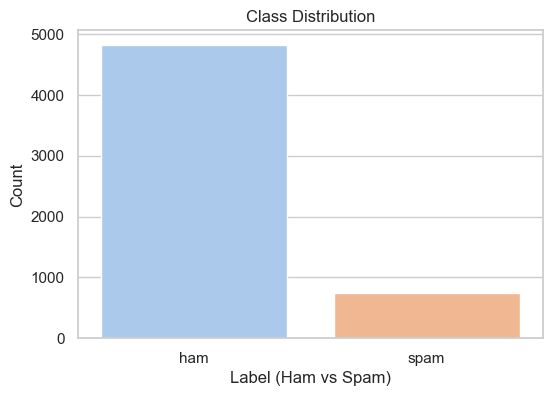

In [16]:
# Step 6: Plot class distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='label', palette='pastel')
plt.title("Class Distribution")
plt.xlabel("Label (Ham vs Spam)")
plt.ylabel("Count")
plt.show()


In [17]:
# Step 7: Preprocess text data
# Encode labels
le = LabelEncoder()
df['label_num'] = le.fit_transform(df['label'])  # spam=1, ham=0

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    df['message'], df['label_num'], test_size=0.2, random_state=42
)

# Vectorize text (Bag of Words)
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)



In [18]:
# Step 8: Train Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train_vec, y_train)


MultinomialNB()


✅ Accuracy: 0.9919282511210762

📉 Confusion Matrix:
[[966   0]
 [  9 140]]


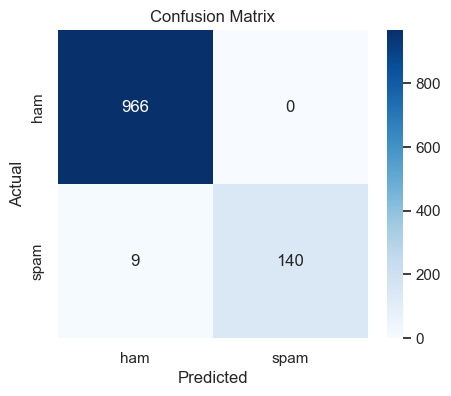


📋 Classification Report:
              precision    recall  f1-score   support

         ham       0.99      1.00      1.00       966
        spam       1.00      0.94      0.97       149

    accuracy                           0.99      1115
   macro avg       1.00      0.97      0.98      1115
weighted avg       0.99      0.99      0.99      1115



In [19]:
# Step 9: Evaluate model
y_pred = model.predict(X_test_vec)

print("\n✅ Accuracy:", accuracy_score(y_test, y_pred))

print("\n📉 Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))


In [20]:
def predict_message(msg):
    msg_vec = vectorizer.transform([msg])
    pred = model.predict(msg_vec)[0]
    return le.inverse_transform([pred])[0]

print(predict_message("Congratulations! You've won a free ticket to Bahamas."))
print(predict_message("Hey, what's up? Call me when you can."))


spam
ham


In [21]:
import joblib

joblib.dump(model, 'naive_bayes_spam_model.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')


['vectorizer.pkl']